In [1]:
from pathlib import Path
import fitz  # PyMuPDF
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
pdf_path = Path("/home/oliver/Oliver.Mono/projects/Vision.OPT_MULT/data/full_images/curie.pdf")


In [3]:
def pdf_to_numpy_arrays(pdf_path):
    # Open the PDF
    pdf_document = fitz.open(pdf_path)
    
    # List to store arrays of each page
    page_arrays = []

    for page_num in range(pdf_document.page_count):
        # Get the page
        page = pdf_document[page_num]
        
        # Render page to a pixmap (image)
        pix = page.get_pixmap()
        
        # Convert pixmap to PIL Image
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        
        # Convert PIL Image to NumPy array
        img_array = np.array(img)
        
        # Append to list
        page_arrays.append(img_array)
    
    # Close the document
    pdf_document.close()

    return page_arrays

# Usage
page_arrays = pdf_to_numpy_arrays(pdf_path)

# Check the shape of arrays (one per page)
for i, page_array in enumerate(page_arrays):
    print(f"Page {i+1} array shape: {page_array.shape}")


Page 1 array shape: (2573, 1771, 3)
Page 2 array shape: (2530, 1819, 3)


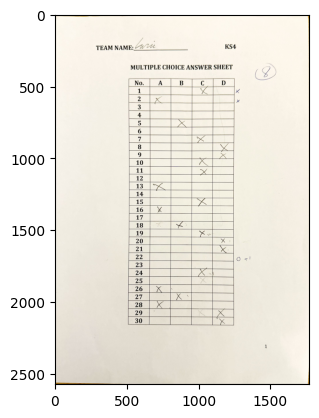

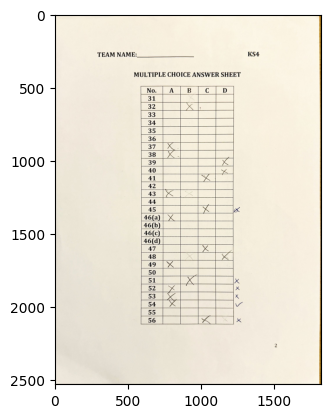

In [4]:
for page_array in page_arrays:
    plt.imshow(page_array)
    plt.show()